# FSK Demodulation

I want to be able to write a software FSK (Frequency Shift Key) Modem. First, I'll try to figure out the Demodulation step...

## Zero-crossing detection

The simplest approach is zero-crossing detection - just see how often the sign changes to determine the frequency in a particular point.


In [1]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

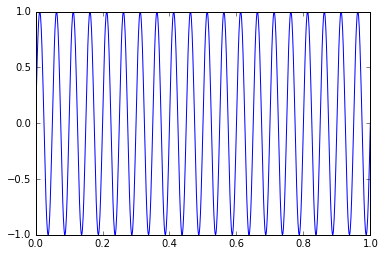

In [2]:
samp_rate = 1000
len_in_sec = 1
carrier_freq = 20  # Hz
t = np.linspace(0, 1, samp_rate * len_in_sec)
carrier = 1*np.sin(carrier_freq * 2 * np.pi * t)
plt.plot(t, carrier)

In [3]:
zero_crossings = np.where(np.diff(np.sign(carrier)))[0]

In [4]:
zero_crossings

array([  0,  24,  49,  74,  99, 124, 149, 174, 199, 224, 249, 274, 299,
       324, 349, 374, 399, 424, 449, 474, 499, 524, 549, 574, 599, 624,
       649, 674, 699, 724, 749, 774, 799, 824, 849, 874, 899, 924, 949, 974])

In [5]:
len(zero_crossings)

40

In [6]:
# Note that in a single wave cycle, there will be 2 zero crossings
frequency_detected = len(zero_crossings) / 2
frequency_detected

20.0

## Multiplying by frequencies

To try to determine the frequency, we can just take the dot product of a number of prospective frequencies, and see which has the largest dot product, which should correspond to the closest approximation of the frequency.

In [22]:
hz_10 = 1*np.sin(10 * 2 * np.pi * t)
hz_20 = 1*np.sin(20 * 2 * np.pi * t)
hz_30 = 1*np.sin(30 * 2 * np.pi * t)

In [23]:
[np.dot(carrier, hz_10), np.dot(carrier, hz_20), np.dot(carrier, hz_30)]

[3.4227828904498381e-14, 499.50000000000006, -5.1039034110189618e-14]

#### Note that the 20hz dot product is way larger than the 10Hz or 30Hz wave

It's worth noting, however, that if the frequency is just a bit off, the dot product is still near zero, so there's not a lot of room for error in terms of the frequency with this approach. Only 0.5Hz off has a near-zero dot product.

In [26]:
np.dot(carrier, 1*np.sin(19.5 * 2 * np.pi * t))

-5.3083232254280688e-13

In [29]:
np.dot(carrier, 1*np.sin(19.6 * 2 * np.pi * t))

117.99304872790121

In [30]:
np.dot(carrier, 1*np.sin(19.7 * 2 * np.pi * t))

253.91777912175343

In [31]:
np.dot(carrier, 1*np.sin(19.8 * 2 * np.pi * t))

379.9246442915134

In [32]:
np.dot(carrier, 1*np.sin(19.9 * 2 * np.pi * t))

468.44184940090764

### Relationship between frequency difference and dot product

Out of curiosity, let's graph the <a href="#frequency_diff_to_dot_product">relationship</a> between the difference in the frequencies and the dot product

In [35]:
def dot_between_freqs(f1, f2):
    t = np.linspace(0, 1, samp_rate * len_in_sec)
    f1_samples = 1*np.sin(f1 * 2 * np.pi * t)
    f2_samples = 1*np.sin(f2 * 2 * np.pi * t)
    return np.dot(f1_samples, f2_samples)

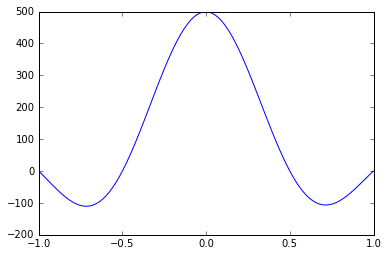

In [43]:
center_freq = 20
frequency_diffs = np.linspace(-1, 1, 100)
dots = [dot_between_freqs(center_freq, center_freq+d) for d in frequency_diffs]
plt.plot(frequency_diffs, dots)

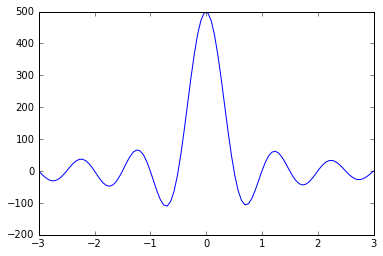

In [44]:
frequency_diffs = np.linspace(-3, 3, 100)
dots = [dot_between_freqs(center_freq, center_freq+d) for d in frequency_diffs]
plt.plot(frequency_diffs, dots)

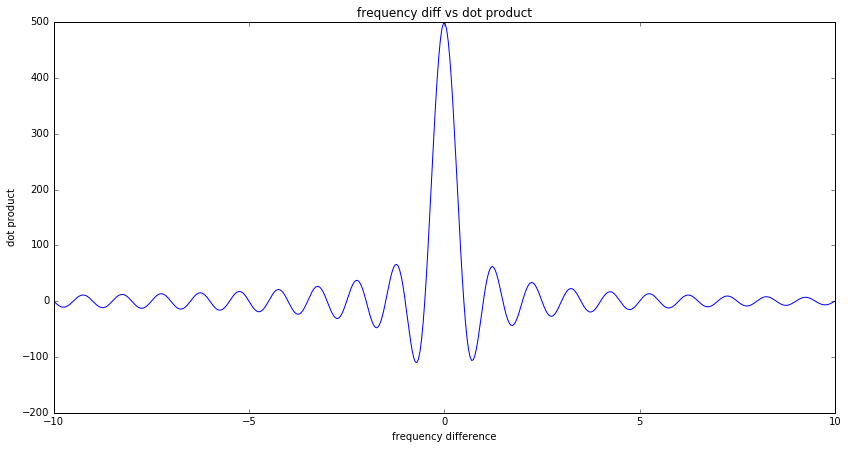

In [51]:
frequency_diffs = np.linspace(-10, 10, 500)
dots = [dot_between_freqs(center_freq, center_freq+d) for d in frequency_diffs]
setup_graph(title='frequency diff vs dot product', x_label='frequency difference', y_label='dot product', fig_size=(14,7))
plt.plot(frequency_diffs, dots)